In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
book_data=pd.read_csv('bx_books.csv',encoding = 'ISO-8859-1')

C:\Users\HP\AppData\Local\Temp\ipykernel_1696\450613966.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  book_data=pd.read_csv('bx_books.csv',encoding = 'ISO-8859-1')


In [3]:
book_data.head()

,isbn,book_title,book_author,year_of_publication,publisher
0,195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,2005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,60973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


In [4]:
book_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271379 entries, 0 to 271378
Data columns (total 5 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   isbn                 271379 non-null  object
 1   book_title           271379 non-null  object
 2   book_author          271378 non-null  object
 3   year_of_publication  271379 non-null  object
 4   publisher            271377 non-null  object
dtypes: object(5)
memory usage: 10.4+ MB


In [5]:
book_data.shape

(271379, 5)

In [6]:
users_data=pd.read_csv('BX-Users.csv',encoding = 'ISO-8859-1')

C:\Users\HP\AppData\Local\Temp\ipykernel_1696\4154948370.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  users_data=pd.read_csv('BX-Users.csv',encoding = 'ISO-8859-1')


In [7]:
users_data.shape

(278859, 3)

In [8]:
users_data.head()

,user_id,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [9]:
users_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278859 entries, 0 to 278858
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   user_id   278859 non-null  object 
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), object(2)
memory usage: 6.4+ MB


In [10]:
ratings_data=pd.read_csv('BX-Book-Ratings.csv',encoding = 'ISO-8859-1')

In [11]:
ratings_data.shape

(1048575, 3)

In [12]:
ratings_data.head()

,user_id,isbn,rating
0,276725,034545104X,0
1,276726,155061224,5
2,276727,446520802,0
3,276729,052165615X,3
4,276729,521795028,6


In [13]:
ratings_data.info

<bound method DataFrame.info of          user_id        isbn  rating
0         276725  034545104X       0
1         276726   155061224       5
2         276727   446520802       0
3         276729  052165615X       3
4         276729   521795028       6
...          ...         ...     ...
1048570   250764   451410777       0
1048571   250764   452264464       8
1048572   250764  048623715X       0
1048573   250764   486256588       0
1048574   250764   515069434       0

[1048575 rows x 3 columns]>

DATA PREPARATION FOR BOOK DATASET

In [14]:
book_data.isnull().sum()

isbn                   0
book_title             0
book_author            1
year_of_publication    0
publisher              2
dtype: int64

In [15]:
book_data.loc[(book_data['book_author'].isnull()),: ]

,isbn,book_title,book_author,year_of_publication,publisher
187700,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995,Edinburgh Financial Publishing


In [16]:
book_data.loc[(book_data['publisher'].isnull()),: ]

,isbn,book_title,book_author,year_of_publication,publisher
128896,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN
129043,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN


In [17]:
book_data.loc[(book_data['isbn'] == '193169656X'),'publisher'] = 'Other'
book_data.loc[(book_data['isbn'] == '1931696993'),'publisher'] = 'Other'

In [18]:
book_data.loc[(book_data['isbn'] == '9627982032'),'book_author'] = 'Other'

In [19]:
book_data['year_of_publication'].unique()

array(['2002', '2001', '1991', '1999', '2000', '1993', '1996', '1988',
       '2004', '1998', '1994', '2003', '1997', '1983', '1979', '1995',
       '1982', '1985', '1992', '1986', '1978', '1980', '1952', '1987',
       '1990', '1981', '1989', '1984', '0', '1968', '1961', '1958',
       '1974', '1976', '1971', '1977', '1975', '1965', '1941', '1970',
       '1962', '1973', '1972', '1960', '1966', '1920', '1956', '1959',
       '1953', '1951', '1942', '1963', '1964', '1969', '1954', '1950',
       '1967', '2005', '1957', '1940', '1937', 'John Peterman', '1955',
       '1946', '1936', '1930', '2011', '1925', '1948', '1943', '1947',
       '1945', '1923', '2020', '1939', '1926', '1938', '2030',
       '\\"Freedom Song\\""', '1911', '1904', '1949', 'Frank Muir',
       '1932', '1928', '1929', '1927', '1931', '1914', '2050', '1934',
       '1910', 'ROBERT A. WILSON', '1933', '1902', 'Karen T. Whittenburg',
       '1924', '1921', '1900', '2038', '2026', 'George H. Scherr', '1944',
       '191

In [20]:
book_data[book_data['year_of_publication'] == '\\"Freedom Song\\""'] 

,isbn,book_title,book_author,year_of_publication,publisher
43665,330482750,"Three Novels: \A Strange and Sublime Address\""","\""Afternoon Raag\""","\""Freedom Song\""""",Amit Chaudhuri


In [21]:
book_data[book_data['year_of_publication'] == 'Frank Muir'] 


,isbn,book_title,book_author,year_of_publication,publisher
51749,413326608,"Upon my word!: More stories from \My word!\"" a...","Tony Shryane""",Frank Muir,1974


In [22]:
book_data[book_data['year_of_publication'] == 'ROBERT A. WILSON'] 

,isbn,book_title,book_author,year_of_publication,publisher
92036,440500702,Schrodinger's Cat Trilogy : \The Universe Next...,"\""The Homing Pigeons\""""",ROBERT A. WILSON,1988


In [23]:
book_data[book_data['year_of_publication'] == 'Karen T. Whittenburg'] 

,isbn,book_title,book_author,year_of_publication,publisher
104317,373166982,"Please Say \I Do\"" (Three Weddings &amp","A Hurricane) (Harlequin American Romance, No ...",Karen T. Whittenburg,1997


In [24]:
book_data[book_data['year_of_publication'] == 'George H. Scherr'] 

,isbn,book_title,book_author,year_of_publication,publisher
121766,894805959,The Best of the Journal of Irreproducible Resu...,"Unfounded Findings\""""",George H. Scherr,1989


In [25]:
book_data[book_data['year_of_publication'] =='Salvador de Madariaga' ] 

,isbn,book_title,book_author,year_of_publication,publisher
144056,8423920143,"GuÃ­a del lector del \Quijote\"": Ensayo psicol...","14 : Ensayo)""",Salvador de Madariaga,1976


In [26]:
book_data[book_data['year_of_publication'] == 'K.C. Constantine'] 

,isbn,book_title,book_author,year_of_publication,publisher
150787,034050823X,"The Double Detective: \The Blank Page\"" &amp","\""A Fix Like This\"" (Crime Club)""",K.C. Constantine,1990


In [27]:
book_data[book_data['year_of_publication'] ==  'Stan Berenstain'] 

,isbn,book_title,book_author,year_of_publication,publisher
157126,039482492X,"C is for Clown: A Circus of \C\"" Words, (Brigh...","early books for beginning beginners)""",Stan Berenstain,1972


In [28]:
book_data[book_data['year_of_publication'] ==  'Francine Pascal'] 

,isbn,book_title,book_author,year_of_publication,publisher
180187,553570722,"\R\"" for Revenge: Written by Kate William",Created by Francine Pascal (Sweet Valley High...,Francine Pascal,1997


In [29]:
book_data[book_data['year_of_publication'] ==  'Luella Hill'] 

,isbn,book_title,book_author,year_of_publication,publisher
185736,096401811X,"Solid as a rock \I\"" stand: Inspirational poet...","short stories""",Luella Hill,1998


In [30]:
book_data[book_data['year_of_publication'] ==  'John Alderson Foote'] 

,isbn,book_title,book_author,year_of_publication,publisher
209386,085409878X,"\Pie-powder\""","being dust from the law courts,""",John Alderson Foote,1973


In [31]:
book_data[book_data['year_of_publication'] ==   'DK Publishing Inc'] 

,isbn,book_title,book_author,year_of_publication,publisher
209550,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...
221691,789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...


In [32]:
book_data[book_data['year_of_publication'] ==   'Jules Janin'] 

,isbn,book_title,book_author,year_of_publication,publisher
220624,1874100055,"\The Dead Donkey\"" &amp","\""The Guillotined Woman\""""",Jules Janin,0


In [33]:
book_data[book_data['year_of_publication'] ==   'Gallimard'] 

,isbn,book_title,book_author,year_of_publication,publisher
220744,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...


In [34]:
book_data[book_data['year_of_publication'] ==   ' &amp'] 

,isbn,book_title,book_author,year_of_publication,publisher
227931,6479839,The LaVyrle Spencer Collection: Three Classic...,"\""Forsaking All Others\""",&amp,"\""A Promise to Cherish\"")"""


In [35]:
book_data[book_data['year_of_publication'] ==   ' Learning"'] 

,isbn,book_title,book_author,year_of_publication,publisher
228955,807735132,"\The Having of Wonderful Ideas\"" &amp",Other Essays on Teaching &amp,"Learning""",Eleanor Duckworth


In [36]:
book_data[book_data['year_of_publication'] ==   'Isadora Duncan'] 

,isbn,book_title,book_author,year_of_publication,publisher
245931,394720784,"\Your Isadora\"": The love story of Isadora Dun...","Gordon Craig""",Isadora Duncan,1976


In [37]:
book_data[book_data['year_of_publication'] ==    'Beatrix Potter'] 

,isbn,book_title,book_author,year_of_publication,publisher
251294,723245827,\The World of Peter Rabbit &amp,"Friends\"" Complete Story Collection""",Beatrix Potter,1999


In [38]:
book_data[book_data['year_of_publication'] ==    'Bart Rulon'] 

,isbn,book_title,book_author,year_of_publication,publisher
259939,1581801653,Artist\s Photo Reference: Water &amp,"Skies (Artists Photo Reference)""",Bart Rulon,2002


In [39]:
book_data[book_data['year_of_publication'] ==     'Alan Rich'] 

,isbn,book_title,book_author,year_of_publication,publisher
261527,006263545X,Ludwig van Beethoven: Play by Play/Symphony No...,"The \""Egmont\"" Overture""",Alan Rich,1995


In [40]:
def replace_df_value(df, idx, col_name, val):
    df.loc[idx, col_name] = val
    return df

In [41]:
replace_df_value(book_data, 43665, 'year_of_publication', 2000)

,isbn,book_title,book_author,year_of_publication,publisher
0,195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,2005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,60973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company
...,...,...,...,...,...
271374,440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm)
271375,525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books
271376,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco
271377,192126040,Republic (World's Classics),Plato,1996,Oxford University Press


In [42]:
replace_df_value(book_data, 51749, 'year_of_publication', 2000)
replace_df_value(book_data, 92036, 'year_of_publication', 2000)

,isbn,book_title,book_author,year_of_publication,publisher
0,195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,2005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,60973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company
...,...,...,...,...,...
271374,440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm)
271375,525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books
271376,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco
271377,192126040,Republic (World's Classics),Plato,1996,Oxford University Press


In [43]:
replace_df_value(book_data, 104317, 'year_of_publication', 2000)
replace_df_value(book_data, 121766, 'year_of_publication', 2000)
replace_df_value(book_data,144056 , 'year_of_publication', 2000)
replace_df_value(book_data, 150787, 'year_of_publication', 2000)
replace_df_value(book_data,157126 , 'year_of_publication', 2000)
replace_df_value(book_data, 180187, 'year_of_publication', 2000)
replace_df_value(book_data,185736 , 'year_of_publication', 2000)
replace_df_value(book_data, 209386, 'year_of_publication', 2000)
replace_df_value(book_data, 209550, 'year_of_publication', 2003)
replace_df_value(book_data, 221691, 'year_of_publication', 2003)
replace_df_value(book_data,220624 , 'year_of_publication', 2004)
replace_df_value(book_data,220744 , 'year_of_publication', 2001)
replace_df_value(book_data,227931 , 'year_of_publication', 2002)
replace_df_value(book_data, 228955, 'year_of_publication', 2003)
replace_df_value(book_data, 245931, 'year_of_publication', 2003)
replace_df_value(book_data,251294 , 'year_of_publication', 2004)
replace_df_value(book_data,259939 , 'year_of_publication', 2001)
replace_df_value(book_data,261527 , 'year_of_publication', 2002)

,isbn,book_title,book_author,year_of_publication,publisher
0,195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,2005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,60973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company
...,...,...,...,...,...
271374,440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm)
271375,525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books
271376,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco
271377,192126040,Republic (World's Classics),Plato,1996,Oxford University Press


In [44]:
book_data['year_of_publication'].unique()

array(['2002', '2001', '1991', '1999', '2000', '1993', '1996', '1988',
       '2004', '1998', '1994', '2003', '1997', '1983', '1979', '1995',
       '1982', '1985', '1992', '1986', '1978', '1980', '1952', '1987',
       '1990', '1981', '1989', '1984', '0', '1968', '1961', '1958',
       '1974', '1976', '1971', '1977', '1975', '1965', '1941', '1970',
       '1962', '1973', '1972', '1960', '1966', '1920', '1956', '1959',
       '1953', '1951', '1942', '1963', '1964', '1969', '1954', '1950',
       '1967', '2005', '1957', '1940', '1937', 'John Peterman', '1955',
       '1946', '1936', '1930', '2011', '1925', '1948', '1943', '1947',
       '1945', '1923', '2020', '1939', '1926', '1938', '2030', 2000,
       '1911', '1904', '1949', '1932', '1928', '1929', '1927', '1931',
       '1914', '2050', '1934', '1910', '1933', '1902', '1924', '1921',
       '1900', '2038', '2026', '1944', '1917', '1901', '2010', '1908',
       '1906', '1935', '1806', '2021', '2012', '2006', 2003, 2004, 2001,
       '

In [45]:
book_data.isnull().sum()

isbn                   0
book_title             0
book_author            0
year_of_publication    0
publisher              0
dtype: int64

USER DATASET

In [46]:
users_data.isnull().sum()

user_id          0
Location         1
Age         110763
dtype: int64

In [47]:
users_data.shape

(278859, 3)

In [48]:
users_data['Age'].unique()

array([ nan,  18.,  17.,  61.,  26.,  14.,  25.,  19.,  46.,  55.,  32.,
        24.,  20.,  34.,  23.,  51.,  31.,  21.,  44.,  30.,  57.,  43.,
        37.,  41.,  54.,  42.,  50.,  39.,  53.,  47.,  36.,  28.,  35.,
        13.,  58.,  49.,  38.,  45.,  62.,  63.,  27.,  33.,  29.,  66.,
        40.,  15.,  60.,   0.,  79.,  22.,  16.,  65.,  59.,  48.,  72.,
        56.,  67.,   1.,  80.,  52.,  69.,  71.,  73.,  78.,   9.,  64.,
       103., 104.,  12.,  74.,  75., 231.,   3.,  76.,  83.,  68., 119.,
        11.,  77.,   2.,  70.,  93.,   8.,   7.,   4.,  81., 114., 230.,
       239.,  10.,   5., 148., 151.,   6., 101., 201.,  96.,  84.,  82.,
        90., 123., 244., 133.,  91., 128.,  94.,  85., 141., 110.,  97.,
       219.,  86., 124.,  92., 175., 172., 209., 212., 237.,  87., 162.,
       100., 156., 136.,  95.,  89., 106.,  99., 108., 210.,  88., 199.,
       147., 168., 132., 159., 186., 152., 102., 116., 200., 115., 226.,
       137., 207., 229., 138., 109., 105., 228., 18

In [49]:
users_data.isnull().sum()

user_id          0
Location         1
Age         110763
dtype: int64

In [50]:
users_data['Age'].unique()

array([ nan,  18.,  17.,  61.,  26.,  14.,  25.,  19.,  46.,  55.,  32.,
        24.,  20.,  34.,  23.,  51.,  31.,  21.,  44.,  30.,  57.,  43.,
        37.,  41.,  54.,  42.,  50.,  39.,  53.,  47.,  36.,  28.,  35.,
        13.,  58.,  49.,  38.,  45.,  62.,  63.,  27.,  33.,  29.,  66.,
        40.,  15.,  60.,   0.,  79.,  22.,  16.,  65.,  59.,  48.,  72.,
        56.,  67.,   1.,  80.,  52.,  69.,  71.,  73.,  78.,   9.,  64.,
       103., 104.,  12.,  74.,  75., 231.,   3.,  76.,  83.,  68., 119.,
        11.,  77.,   2.,  70.,  93.,   8.,   7.,   4.,  81., 114., 230.,
       239.,  10.,   5., 148., 151.,   6., 101., 201.,  96.,  84.,  82.,
        90., 123., 244., 133.,  91., 128.,  94.,  85., 141., 110.,  97.,
       219.,  86., 124.,  92., 175., 172., 209., 212., 237.,  87., 162.,
       100., 156., 136.,  95.,  89., 106.,  99., 108., 210.,  88., 199.,
       147., 168., 132., 159., 186., 152., 102., 116., 200., 115., 226.,
       137., 207., 229., 138., 109., 105., 228., 18

In [51]:
users_data.Age[(users_data['Age'] > 90) | (users_data['Age'] < 5)] = np.nan
users_data['Age'].fillna((users_data['Age'].mean()), inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_1696\3134289947.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  users_data.Age[(users_data['Age'] > 90) | (users_data['Age'] < 5)] = np.nan


In [52]:
users_data['Location'].dropna(inplace=True)

In [53]:
users_data.isna().sum()

user_id     0
Location    1
Age         0
dtype: int64

In [54]:
users_data['Location'].unique()

array(['nyc, new york, usa', 'stockton, california, usa',
       'moscow, yukon territory, russia', ...,
       'sergnano, lombardia, italy', 'stranraer, n/a, united kingdom',
       'tacoma, washington, united kingdom'], dtype=object)

In [55]:
users_data['Age'].unique()

array([34.72384042, 18.        , 17.        , 61.        , 26.        ,
       14.        , 25.        , 19.        , 46.        , 55.        ,
       32.        , 24.        , 20.        , 34.        , 23.        ,
       51.        , 31.        , 21.        , 44.        , 30.        ,
       57.        , 43.        , 37.        , 41.        , 54.        ,
       42.        , 50.        , 39.        , 53.        , 47.        ,
       36.        , 28.        , 35.        , 13.        , 58.        ,
       49.        , 38.        , 45.        , 62.        , 63.        ,
       27.        , 33.        , 29.        , 66.        , 40.        ,
       15.        , 60.        , 79.        , 22.        , 16.        ,
       65.        , 59.        , 48.        , 72.        , 56.        ,
       67.        , 80.        , 52.        , 69.        , 71.        ,
       73.        , 78.        ,  9.        , 64.        , 12.        ,
       74.        , 75.        , 76.        , 83.        , 68.  

RATINGS DATASET

In [56]:
ratings_data.shape

(1048575, 3)

In [57]:
ratings_data.isnull().sum()

user_id    0
isbn       0
rating     0
dtype: int64

In [58]:
ratings_data.head()

,user_id,isbn,rating
0,276725,034545104X,0
1,276726,155061224,5
2,276727,446520802,0
3,276729,052165615X,3
4,276729,521795028,6


In [59]:
unique_ratings_data = ratings_data[ratings_data.isbn.isin(book_data.isbn)]
unique_ratings_data


,user_id,isbn,rating
0,276725,034545104X,0
1,276726,155061224,5
2,276727,446520802,0
3,276729,052165615X,3
4,276729,521795028,6
...,...,...,...
1048570,250764,451410777,0
1048571,250764,452264464,8
1048572,250764,048623715X,0
1048573,250764,486256588,0


In [60]:
print(ratings_data.shape)
print(unique_ratings_data.shape)

(1048575, 3)
(941148, 3)


In [61]:
unique_ratings_data['rating'].unique()

array([ 0,  5,  3,  6,  7,  9,  8, 10,  1,  4,  2], dtype=int64)

DATA VISUALIZATION

Text(0.5, 1.0, 'Top 20 author with number of books')

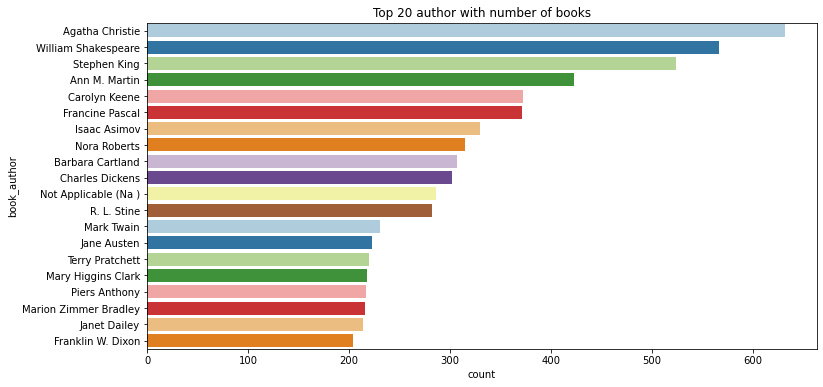

In [62]:
plt.figure(figsize=(12,6))
sns.countplot(y="book_author",palette = 'Paired', data=book_data,order=book_data['book_author'].value_counts().index[0:20])
plt.title("Top 20 author with number of books")

Text(0.5, 1.0, 'Top 20 Publishers with number of books released')

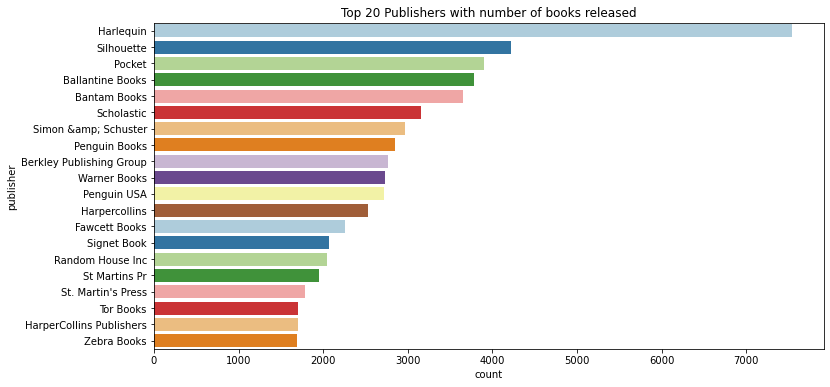

In [63]:
plt.figure(figsize=(12,6))
sns.countplot(y="publisher",palette = 'Paired', data=book_data,order=book_data['publisher'].value_counts().index[0:20])
plt.title("Top 20 Publishers with number of books released")

In [64]:
book_data[book_data.year_of_publication == 0].year_of_publication.count()

151

In [65]:
book_data.year_of_publication.replace(0, np.nan, inplace=True)

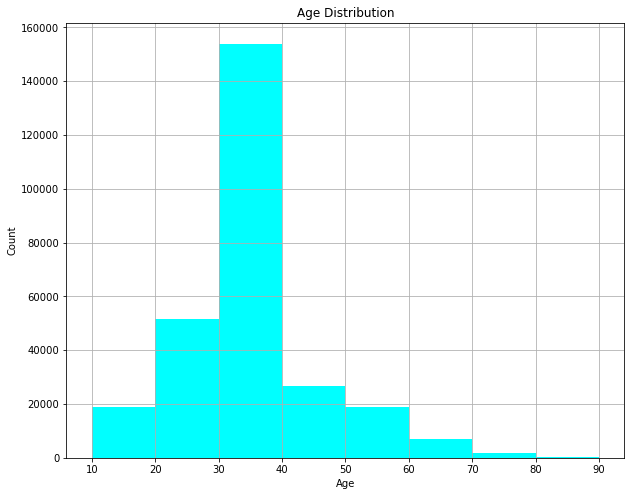

In [66]:
plt.figure(figsize=(10,8))
users_data.Age.hist(bins=[10*i for i in range(1, 10)], color = 'cyan')     
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

Text(0.5, 1.0, 'Top 20 books as per number of ratings')

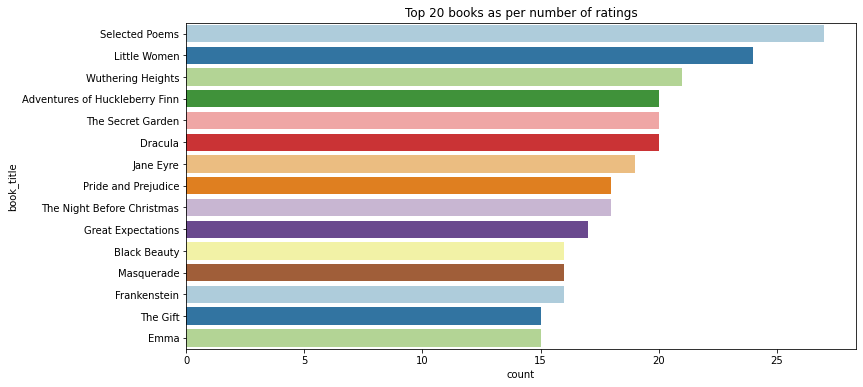

In [67]:
plt.figure(figsize=(12,6))
sns.countplot(y="book_title",palette = 'Paired',data= book_data, order=book_data['book_title'].value_counts().index[0:15])
plt.title("Top 20 books as per number of ratings")

<AxesSubplot:xlabel='rating', ylabel='count'>

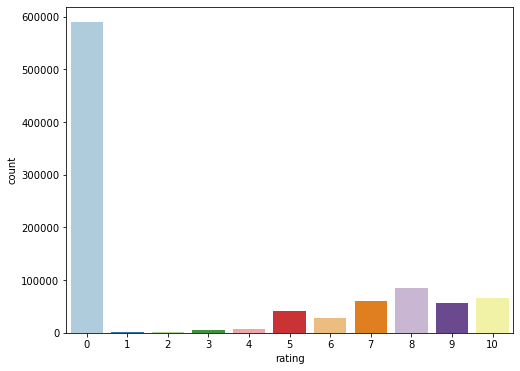

In [68]:
plt.figure(figsize=(8,6))
sns.countplot(x="rating",palette = 'Paired',data= unique_ratings_data)

Text(0.5, 1.0, 'Explicit Ratings')

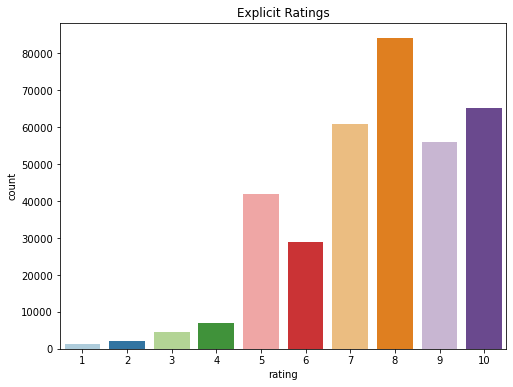

In [69]:
plt.figure(figsize=(8,6))
rate_data = unique_ratings_data[unique_ratings_data['rating'] != 0]
sns.countplot(x="rating",palette = 'Paired',data=rate_data)
plt.title("Explicit Ratings")

In [70]:
ratings_explicit= unique_ratings_data[unique_ratings_data['rating'] != 0]
ratings_implicit= unique_ratings_data[unique_ratings_data['rating'] == 0]

In [71]:
ratings_explicit.head()

,user_id,isbn,rating
1,276726,155061224,5
3,276729,052165615X,3
4,276729,521795028,6
8,276744,038550120X,7
16,276747,60517794,9


In [72]:
ratings_implicit.head()

,user_id,isbn,rating
0,276725,034545104X,0
2,276727,446520802,0
5,276733,2080674722,0
10,276746,425115801,0
11,276746,449006522,0


In [73]:
print(unique_ratings_data.shape)
print(ratings_explicit.shape)

(941148, 3)
(351865, 3)


In [74]:
update_book_df= pd.merge(book_data, ratings_explicit, on='isbn')
update_book_df.head()

,isbn,book_title,book_author,year_of_publication,publisher,user_id,rating
0,2005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,8,5
1,2005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,11676,8
2,2005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,67544,8
3,2005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,116866,9
4,2005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,123629,9


In [75]:
update_book_df.shape

(351865, 7)

In [76]:
update_book_df['book_title'].shape

(351865,)

In [77]:
update_book_df['book_title'].nunique()

128584

In [78]:
top_ten_books= pd.DataFrame(update_book_df.groupby('book_title')['rating'].count()
                         .sort_values(ascending=False).head(10))
print('The top ten books as per ratings value : ')
top_ten_books

The top ten books as per ratings value : 


,rating
book_title,
The Lovely Bones: A Novel,635
Wild Animus,526
The Da Vinci Code,459
The Secret Life of Bees,377
The Nanny Diaries: A Novel,355
The Red Tent (Bestselling Backlist),354
Bridget Jones's Diary,342
A Painted House,334
Life of Pi,297


In [80]:
#SPLIT DATA INTO TWO SETS (TRAIN AND TEST)

In [ ]:
from sklearn import model_selection
train_data, test_data = model_selection.train_test_split(update_book_df, test_size=0.30)

In [ ]:
print(f'Training set lengths: {len(train_data)}')
print(f'Testing set lengths: {len(test_data)}')
print(f'Test set is {(len(test_data)/(len(train_data)+len(test_data))*100):.0f}% of the full dataset.')

In [ ]:

u_unique_train = train_data.user_id.unique()  
train_data_user2idx = {o:i for i, o in enumerate(u_unique_train)}


i_unique_train = train_data.isbn.unique()  
train_data_book2idx = {o:i for i, o in enumerate(i_unique_train)}

In [ ]:
u_unique_test = test_data.user_id.unique()  
test_data_user2idx = {o:i for i, o in enumerate(u_unique_test)}


i_unique_test = test_data.isbn.unique() 
test_data_book2idx = {o:i for i, o in enumerate(i_unique_test)}

In [ ]:

train_data['u_unique'] = train_data['user_id'].map(train_data_user2idx)
train_data['i_unique'] = train_data['isbn'].map(train_data_book2idx)


test_data['u_unique'] = test_data['user_id'].map(test_data_user2idx)
test_data['i_unique'] = test_data['isbn'].map(test_data_book2idx)


train_data = train_data[['u_unique', 'i_unique', 'rating']]
test_data = test_data[['u_unique', 'i_unique', 'rating']]

In [ ]:
train_data.sample(10)

In [ ]:
test_data.sample(10)

BUILD A MATRIX

In [ ]:
n_users = train_data['u_unique'].nunique()
n_books = train_data['i_unique'].nunique()

train_matrix = np.zeros((n_users, n_books),dtype='uint8')

for entry in train_data.itertuples():                  
    train_matrix[entry[1]-1, entry[2]-1] = entry[3] 

In [ ]:
train_matrix.shape

In [ ]:
n_users = test_data['u_unique'].nunique()
n_books = test_data['i_unique'].nunique()

test_matrix = np.zeros((n_users, n_books),dtype='uint8')

for entry in test_data.itertuples():
    test_matrix[entry[1]-1, entry[2]-1] = entry[3] 

In [ ]:
test_matrix.shape

In [ ]:
train_matrix_small = train_matrix[:5000, :5000]
test_matrix_small = test_matrix[:5000, :5000]

from sklearn.metrics.pairwise import pairwise_distances
user_similarity = pairwise_distances(train_matrix_small, metric='cosine')
item_similarity = pairwise_distances(train_matrix_small.T, metric='cosine')

In [ ]:
def predict_books(ratings, similarity, type='user'):
    if type == 'user':
        mean_user_rating = ratings.mean(axis=1)
        
       
        ratings_diff = (ratings - mean_user_rating[:, np.newaxis])
        pred = mean_user_rating[:, np.newaxis] + similarity.dot(ratings_diff) / np.array([np.abs(similarity).sum(axis=1)]).T
    elif type == 'item':
        pred = ratings.dot(similarity) / np.array([np.abs(similarity).sum(axis=1)])
    return pred

In [ ]:
item_prediction = predict_books(train_matrix_small, item_similarity, type='item')
user_prediction = predict_books(train_matrix_small, user_similarity, type='user')

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

def rmse(prediction, test_matrix):
    prediction = prediction[test_matrix.nonzero()].flatten()
    test_matrix = test_matrix[test_matrix.nonzero()].flatten()
    return sqrt(mean_squared_error(prediction, test_matrix))

print(f'Item-based CF RMSE: {rmse(item_prediction, test_matrix_small)}')
print(f'User-based CF RMSE: {rmse(user_prediction, test_matrix_small)}')